---
# Create configuration file for working with Salish Sea Model results

---


In [1]:
import sys
import yaml
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

## Define main directory 

In [2]:
# Main dictionary used to output values to SSM_config.yaml
ssm = {}

## Model variable names for two versions of model output
- The model output used in the bounding scenario runs names variables as "Var_XX". `model_tags` is a dictionary that relates variable names to the model output names.  i.e. ```ssm['var_name']['DO'] yields 'Var_10'```, which is the SSM variable name for "DO"
- The output netcdf from Ben's C++ script yields the `name_list` of variables 

In [3]:
ssm['variables']={}

# King County runs
ssm['variables']['name_list']=['time','depth','DOXG','LDOC','B1','B2',
                    'NH4','NO3','PO4','temp','salinity','RDOC','LPOC',
                    'RPOC','TDIC','TALK','pH','pCO2'] 

## Create array of percentages for depth levels
Multiply these values by the total depth of the water column to get the layer thickness for each model level. This layer thickness is used to calculate volume days.
These values were provided by Su Kyong Yun in her script `volume_calculation.py` on 6/9/2022.

In [4]:
ssm['siglev_diff']=numpy.array(
    [ 3.2,  5.7,  7.5,  8.9, 10.1, 11.1, 12.1, 13. , 13.8, 14.6]
).tolist() #b/c safedump dosn't allow for objects
# # Updated values given by Su Kyong August 10th, 2022, via Teams chat. 
# ssm['siglev_diff']=numpy.array(
#     [3.2, 5.8, 7.4, 9, 9.8, 11.4, 11.8, 13.4, 13.4, 15]
# ).tolist() #b/c safedump dosn't allow for objects

In [5]:
sum(ssm['siglev_diff'])

99.99999999999999

## Create dictionary for station locations
My code hasn't yet been updated to utilize this dictionary but I'm placing it here for the next round of upgrades and for archive/reference purposes

Data for NOAA station 46118 is explained here: https://www.ndbc.noaa.gov/measdes.shtml#ocean 

Data downloaded from NANOOS: http://nvs.nanoos.org/Explorer
Buoy information here :https://nwem.apl.washington.edu/about_proj_BBAY.shtml

In [6]:
ssm['stations']={
    "Se'lhaemNOAA_46118":[48.724, -122.576],
    'BHAM-Bay':[48.767422,-122.575792],
    'Birch Bay':[48.898880,-122.781905],
    'Birch Bay (Point Whitehorn)': [48.895273,-122.805067],
    'Cherry Point': [48.868451,-122.780400],
    'Eastsound':[48.684406,-122.898953],
    'Quartermaster Harbor': [47.3793, -122.462]
}

## Define colors used for color plots
See [this cheatsheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png) or [this list of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for more color options

Run list will include:
1. WWTP
    - a. **Baseline**: all plants on (using output data set for Existing, Ecology (2021))
    - b. **no SOG/NB WWTP source**: All SOG/NB WWTPs plants off (data from Scenario 4, Ecology (2021)
    - c. **BHAM-only**: Shutting off all small WWTP plants (BNR <100) = all except Bellngham
    - e. **no BHAM**: Shutting off only the 1 medium plant (BNR >100) (Bellingham).
2. Rivers
    - a. **0.5x riverine** loading for those rivers entering SOG/NB
    - b. **2x  riverine** loading for those rivers entering SOG/NB

darkviolet
rebeccapurple
royalblue
teal
darkslategrey
steelblue
sienna
brown


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


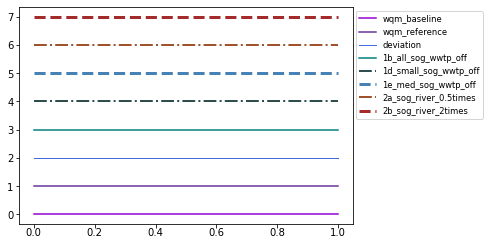

In [7]:
ssm['line']={}
ssm['line']['color']={}
ssm['line']['width']={}
ssm['line']['style']={}

ssm['line']['color']['wqm_baseline'] = 'darkviolet'
ssm['line']['color']['wqm_reference'] = 'rebeccapurple'
ssm['line']['color']['deviation'] = 'royalblue'
ssm['line']['color']['1b_all_sog_wwtp_off']='teal'
ssm['line']['color']['1d_small_sog_wwtp_off']='darkslategrey'
ssm['line']['color']['1e_med_sog_wwtp_off']='steelblue'
ssm['line']['color']['2a_sog_river_0.5times']= 'sienna'
ssm['line']['color']['2b_sog_river_2times']= 'brown'

ssm['line']['width']['wqm_baseline'] = 1.5
ssm['line']['width']['wqm_reference'] = 1.5
ssm['line']['width']['deviation'] = 1
ssm['line']['width']['1b_all_sog_wwtp_off']=1.5
ssm['line']['width']['1d_small_sog_wwtp_off']=2.0
ssm['line']['width']['1e_med_sog_wwtp_off']=3.0
ssm['line']['width']['2a_sog_river_0.5times']= 2.0
ssm['line']['width']['2b_sog_river_2times']= 3.0

ssm['line']['style']['wqm_baseline'] = 'solid'
ssm['line']['style']['wqm_reference'] = 'solid'
ssm['line']['style']['deviation'] = 'solid'
ssm['line']['style']['1b_all_sog_wwtp_off']='solid'
ssm['line']['style']['1d_small_sog_wwtp_off']='dashdot'
ssm['line']['style']['1e_med_sog_wwtp_off']='dashed'
ssm['line']['style']['2a_sog_river_0.5times']= 'dashdot'
ssm['line']['style']['2b_sog_river_2times']= 'dashed'
# plot these color options
fig = plt.figure()
ax = plt.axes()
x = numpy.linspace(0, 1, 10)
for idx,case in enumerate(ssm['line']['color']):
    print(ssm['line']['color'][case])
    ax.plot(x,idx*numpy.ones(len(x)),
            color=ssm['line']['color'][case],
            linestyle=ssm['line']['style'][case],
            linewidth=ssm['line']['width'][case],
            label=case)
ax.legend(loc='upper right',bbox_to_anchor=(1.4,1))

grey
black
royalblue
palevioletred
mediumpurple
indigo
cadetblue
darkslategrey


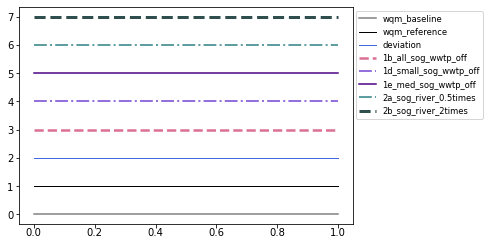

In [8]:
ssm['line']['color']['wqm_baseline'] = 'grey'
ssm['line']['color']['wqm_reference'] = 'black'
ssm['line']['color']['1b_all_sog_wwtp_off']='palevioletred'
ssm['line']['color']['1d_small_sog_wwtp_off']='mediumpurple'
ssm['line']['color']['1e_med_sog_wwtp_off']='indigo'
ssm['line']['color']['2a_sog_river_0.5times']= 'cadetblue'
ssm['line']['color']['2b_sog_river_2times']= 'darkslategrey'
    
ssm['line']['width']['wqm_baseline'] = 1.5
ssm['line']['width']['wqm_reference'] = 1.0
ssm['line']['width']['1b_all_sog_wwtp_off']=2.5
ssm['line']['width']['1d_small_sog_wwtp_off']=2.0
ssm['line']['width']['1e_med_sog_wwtp_off']=1.5
ssm['line']['width']['2a_sog_river_0.5times']= 2.0
ssm['line']['width']['2b_sog_river_2times']= 3.0

ssm['line']['style']['wqm_baseline'] = 'solid'
ssm['line']['style']['wqm_reference'] = 'solid'
ssm['line']['style']['1b_all_sog_wwtp_off']='dashed'
ssm['line']['style']['1d_small_sog_wwtp_off']='dashdot'
ssm['line']['style']['1e_med_sog_wwtp_off']='solid'
ssm['line']['style']['2a_sog_river_0.5times']= 'dashdot'
ssm['line']['style']['2b_sog_river_2times']= 'dashed'
# plot these color options
fig = plt.figure()
ax = plt.axes()
x = numpy.linspace(0, 1, 10)
for idx,case in enumerate(ssm['line']['color']):
    print(ssm['line']['color'][case])
    ax.plot(x,idx*numpy.ones(len(x)),
            color=ssm['line']['color'][case],
            linestyle=ssm['line']['style'][case],
            linewidth=ssm['line']['width'][case],
            label=case)
ax.legend(loc='upper right',bbox_to_anchor=(1.4,1))

## Define black and white line-style formatting

In [9]:
ssm['bw_line']={}
ssm['bw_line']['color']={}
ssm['bw_line']['width']={}
ssm['bw_line']['style']={}
# All scenarios
ssm['bw_line']['color']['scenario']='grey'
ssm['bw_line']['width']['scenario']=1.5
ssm['bw_line']['style']['scenario']='dashed'
# 2014 Baseline condition
ssm['bw_line']['color']['baseline']='black'
ssm['bw_line']['width']['baseline']=1
ssm['bw_line']['style']['baseline']='solid'
# Reference condition
ssm['bw_line']['color']['reference']='black'
ssm['bw_line']['width']['reference']=1.5
ssm['bw_line']['style']['reference']='dashdot'

## Define colors for different parameters

In [10]:
ssm['bar']={}
ssm['bar']['colors']={}
ssm['bar']['colors']['DOXG']='deepskyblue'
ssm['bar']['colors']['NO3']='y'
ssm['bar']['colors']['NH4']='darkolivegreen'

ssm['region']={}
ssm['region']['colors']={}
ssm['region']['colors']['Hood']='darkseagreen'
ssm['region']['colors']['Main']='mediumpurple'
ssm['region']['colors']['SJFAdmiralty']='lightsteelblue'
ssm['region']['colors']['SOG_Bellinghham']='rosybrown'
ssm['region']['colors']['SouthSound']='c'
ssm['region']['colors']['Whidbey']='cornflowerblue'
ssm['region']['colors']['ALL_REGIONS']='black'

## Define location(s) for model output and graphics files

## Path definitions

In [11]:
root_output = '/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/'
ssm['paths']={}
ssm['paths']['model_output']={}
# SOG-NB cases
ssm['paths']['model_output']['SOG_NB'] = [
    root_output+'wqm_baseline/ssm_output.nc',
    root_output+'wqm_reference/ssm_output.nc',
     root_output+'1b_all_sog_wwtp_off/ssm_output.nc',
     root_output+'1d_small_sog_wwtp_off/ssm_output.nc',
     root_output+'1e_med_sog_wwtp_off/ssm_output.nc',
     root_output+'2a_sog_river_0.5times/ssm_output.nc',
     root_output+ '2b_sog_river_2times/ssm_output.nc'   
    ]

ssm['paths']['processed_output'] = ( 
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/'
)
# Define directory for saving graphics output
ssm['paths']['graphics'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/'
)
# Define directory for saving graphics output
ssm['paths']['movies'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/movies/'
)

# Define location and name of Shapefile to use for planar graphics
# This version corrects typos in region names and imposes a uniform format for 
# region names
ssm['paths']['shapefile'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/KingCounty-Rachael/'\
    'kevin_shapefiles/SSMGrid2_09062022/SSMGrid2_tce_ecy_node_info_v2_09062022.shp'
)



## Run information

In [12]:
ssm['run_information']={}

# Number of spin-up days removed from model output in post-processing
ssm['run_information']['spin_up_days']=5

# Run descriptions and names
ssm['run_information']['baseline']='wqm_baseline'
ssm['run_information']['reference']='wqm_reference'
ssm['run_information']['SOG_NB_rivers']={
    'wqm_baseline':'exist',
    'wqm_reference':'ref',
    '2a_sog_river_0.5times':'2a',
    '2b_sog_river_2times':'2b'
}
ssm['run_information']['SOG_NB_WWTPs']={
    'wqm_baseline':'exist',
    'wqm_reference':'ref',
    '1b_all_sog_wwtp_off':'1b',
    '1d_small_sog_wwtp_off':'1d',
    '1e_med_sog_wwtp_off': '1e',
}

ssm['run_information']['run_description']={}
ssm['run_information']['run_description']['SOG_NB']={
    'wqm_baseline':'Modern day nutrient loading',
    'wqm_reference':'Pre-industrial nutrient loading',
    '1b_all_sog_wwtp_off':'1b: No SOG/NB WWTP',
    '1c_all_sog_riv_off':'1c: No SOG/NB River Loading',
    '1d_small_sog_wwtp_off':'1d: No SOG/NB WWTP<100',
    '1e_med_sog_wwtp_off': '1e: No SOG/NB WWTP>100',
    '2a_sog_river_0.5times':'2a: 0.5x(River Loading)\nin SOG/NB',
    '2b_sog_river_2times':'2b: 2.0x(River Loading)\nin SOG/NB'
}
ssm['run_information']['run_tag']={}
ssm['run_information']['run_tag']['SOG_NB']={
    'wqm_baseline':'Present Day',
    'wqm_reference':'Reference',
    '1b_all_sog_wwtp_off':'1b',
    '1c_all_sog_riv_off':'1c',
    '1d_small_sog_wwtp_off':'1d',
    '1e_med_sog_wwtp_off': '1e',
    '2a_sog_river_0.5times':'2a',
    '2b_sog_river_2times':'2b'
}

## Save specifications to file
-Use `sort_keys=False` to preserve dictionary order

In [13]:
with open('SSM_config_SOG.yaml', 'w') as file:
    document = yaml.safe_dump(ssm, file,sort_keys=True)